In [1]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data from UCI Machine Learning Repository:

In [2]:
# only have to run once

try:
    # Create data Directory
    os.mkdir('data')
    print("data Directory Created ") 
except FileExistsError:
    print("data Directory already exists")


!wget -O data/processed.cleveland.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
!wget -O data/processed.hungarian.data.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
!wget -O data/processed.switzerland.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data
!wget -O data/processed.va.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data
!wget -O data/heart-disease.names.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
                

data Directory Created 


--2020-01-14 23:21:41--  http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: 'data/processed.cleveland.data.csv'

     0K .......... ........                                   100% 90.9K=0.2s

2020-01-14 23:21:42 (90.9 KB/s) - 'data/processed.cleveland.data.csv' saved [18461/18461]

--2020-01-14 23:21:42--  http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10263 (10K) [application/x-httpd-php]
Saving to: 'data/processed.hungarian

### Concatenate 4 datasets to one:

In [3]:
allFiles = glob.glob('data' + '/*.data.csv')

heart_disease_df = pd.DataFrame()
list_ = []

# column names as described in heart-disease.names.csv file
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, names=col_names)
    list_.append(df)
heart_disease_df = pd.concat(list_, sort=False, ignore_index=True)
heart_disease_df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
915,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1
916,62.0,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2
918,58.0,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0
919,62.0,1.0,2.0,120,254,0,2,93,1,0,?,?,?,1


### Data Cleaning

In [4]:
# Replace '?' values with np.nan
heart_disease_df.replace(to_replace='?', value=-np.nan, inplace=True)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
915,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1
916,62.0,1.0,1.0,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2
918,58.0,1.0,4.0,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0
919,62.0,1.0,2.0,120,254,0,2,93,1,0,NaN,NaN,NaN,1


In [5]:
# count percentage of NaN values in each dataset column
(1 - heart_disease_df.count() / len(heart_disease_df)) * 100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalach      5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [6]:
# clear rows of columns that have NaN percentage < 10 %
cols_to_clear = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']
for col_name in cols_to_clear:
    heart_disease_df.drop(heart_disease_df[heart_disease_df[col_name].isnull()].index, inplace=True)
heart_disease_df.reset_index(drop=True, inplace=True)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158,170,0,1,138,1,0,NaN,NaN,NaN,1
736,46.0,1.0,4.0,134,310,0,0,126,0,0,NaN,NaN,3,2
737,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1
738,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2
739,62.0,1.0,2.0,120,254,0,2,93,1,0,NaN,NaN,NaN,1


In [7]:
# replace remaining NaN values with -1 (unknown)
heart_disease_df.replace(to_replace=np.nan, value=-1, inplace=True)
heart_disease_df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158,170,0,1,138,1,0,-1,-1,-1,1
736,46.0,1.0,4.0,134,310,0,0,126,0,0,-1,-1,3,2
737,54.0,0.0,4.0,127,333,1,1,154,0,0,-1,-1,-1,1
738,55.0,1.0,4.0,122,223,1,1,100,0,0,-1,-1,6,2
739,62.0,1.0,2.0,120,254,0,2,93,1,0,-1,-1,-1,1


In [8]:
# convert all numbers to float
heart_disease_df = heart_disease_df.astype(float)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,-1.0,-1.0,-1.0,1.0
736,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,-1.0,-1.0,3.0,2.0
737,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
738,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,-1.0,-1.0,6.0,2.0
739,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,-1.0,-1.0,-1.0,1.0


In [9]:
heart_disease_df['trestbps'].value_counts(normalize=True) * 100

120.0    16.081081
130.0    13.783784
140.0    11.621622
150.0     6.756757
110.0     6.081081
160.0     5.810811
125.0     3.108108
128.0     2.297297
138.0     2.027027
135.0     2.027027
112.0     1.756757
145.0     1.621622
170.0     1.621622
122.0     1.621622
132.0     1.621622
124.0     1.486486
115.0     1.486486
118.0     1.351351
100.0     1.351351
180.0     1.351351
142.0     1.216216
136.0     1.081081
134.0     1.081081
126.0     0.945946
152.0     0.945946
108.0     0.945946
144.0     0.810811
105.0     0.675676
155.0     0.675676
158.0     0.540541
178.0     0.405405
200.0     0.405405
146.0     0.405405
106.0     0.405405
172.0     0.270270
104.0     0.270270
102.0     0.270270
94.0      0.270270
190.0     0.270270
148.0     0.270270
156.0     0.270270
154.0     0.270270
114.0     0.270270
116.0     0.270270
165.0     0.135135
127.0     0.135135
96.0      0.135135
0.0       0.135135
92.0      0.135135
164.0     0.135135
98.0      0.135135
117.0     0.135135
129.0     0.

In [10]:
heart_disease_df['chol'].value_counts(normalize=True) * 100

0.0      10.675676
254.0     1.351351
220.0     1.351351
223.0     1.216216
230.0     1.216216
           ...    
313.0     0.135135
311.0     0.135135
365.0     0.135135
347.0     0.135135
170.0     0.135135
Name: chol, Length: 208, dtype: float64

In [11]:
# remove rows with trestbps or chol = 0
heart_disease_df.drop(heart_disease_df[heart_disease_df['trestbps'] == 0].index, inplace=True)
heart_disease_df.drop(heart_disease_df[heart_disease_df['chol'] == 0].index, inplace=True)
heart_disease_df.reset_index(drop=True, inplace=True)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
656,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,-1.0,-1.0,-1.0,1.0
657,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,-1.0,-1.0,3.0,2.0
658,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
659,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,-1.0,-1.0,6.0,2.0
660,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,-1.0,-1.0,-1.0,1.0


In [12]:
# percentage of deleted rows
print( (920-661)/920*100 )

28.152173913043477


In [14]:
# group data into 2 categories of ‘no heart disease’ (value of 0) and ‘displaying heart disease’ (value of 1)
heart_disease_df.loc[heart_disease_df['num'] == 2, 'num'] = 1
heart_disease_df.loc[heart_disease_df['num'] == 3, 'num'] = 1
heart_disease_df.loc[heart_disease_df['num'] == 4, 'num'] = 1
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
656,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,-1.0,-1.0,-1.0,1.0
657,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,-1.0,-1.0,3.0,1.0
658,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
659,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,-1.0,-1.0,6.0,1.0
660,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,-1.0,-1.0,-1.0,1.0


In [33]:
# calculate class balance
heart_disease_df['num'].value_counts(normalize=True) * 100

0.0    52.496218
1.0    47.503782
Name: num, dtype: float64

### Visualize dataset

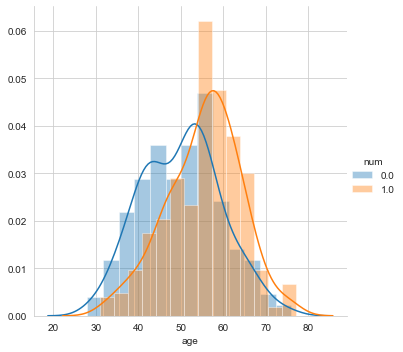

In [31]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'age').add_legend()

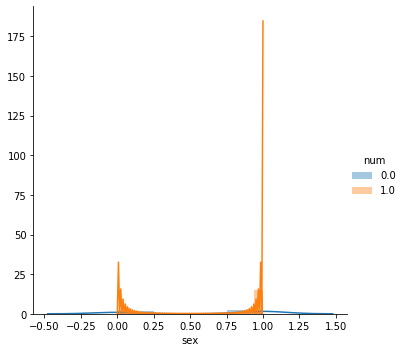

In [16]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'sex').add_legend()

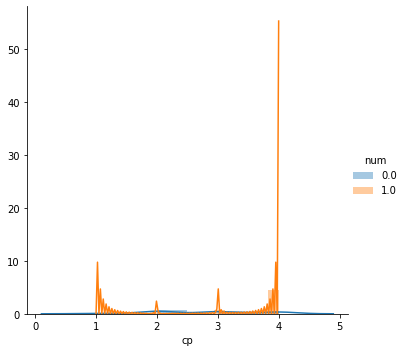

In [17]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'cp').add_legend()

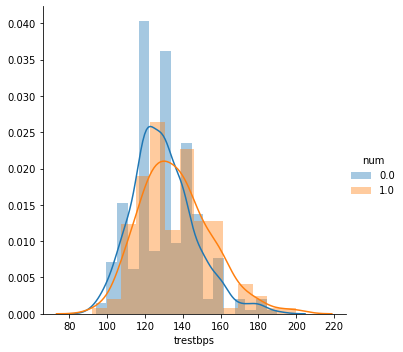

In [18]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'trestbps').add_legend()

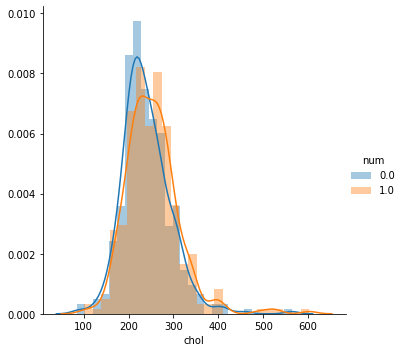

In [19]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'chol').add_legend()

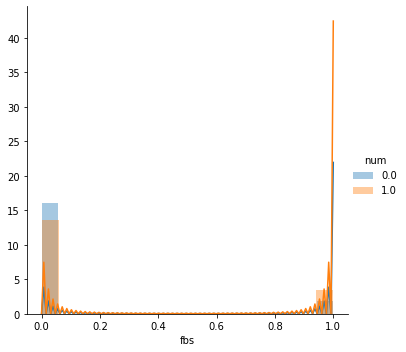

In [20]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'fbs').add_legend()

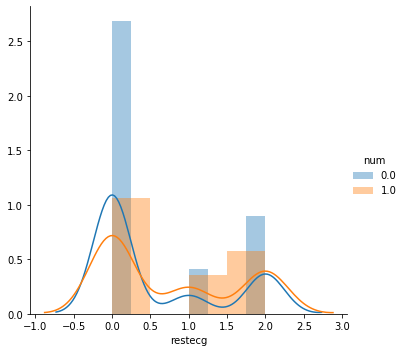

In [21]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'restecg').add_legend()

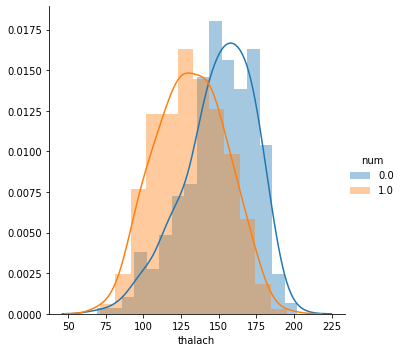

In [22]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'thalach').add_legend()

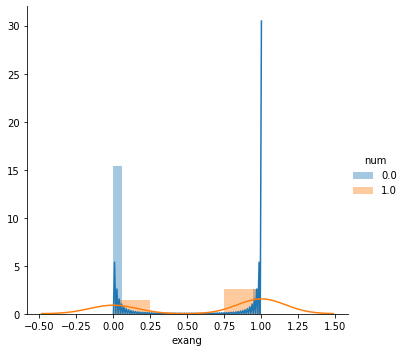

In [23]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'exang').add_legend()

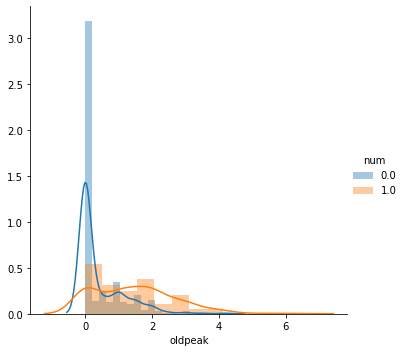

In [24]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'oldpeak').add_legend()

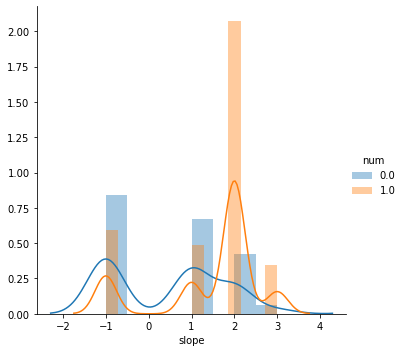

In [25]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'slope').add_legend()

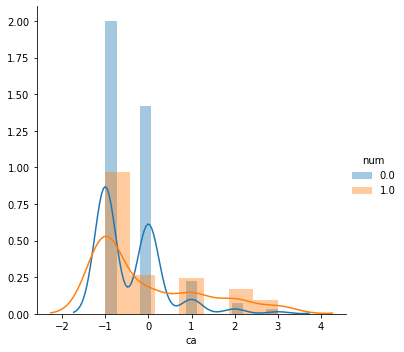

In [26]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'ca').add_legend()

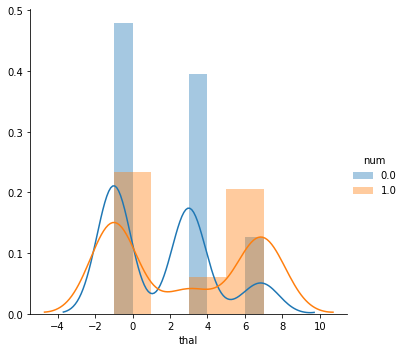

In [27]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'thal').add_legend()

### Feature correlation

In [28]:
heart_disease_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.010885,0.189123,0.260721,0.095700,0.236158,0.225696,-0.361131,0.231771,0.274029,0.316250,0.286739,0.204796,0.281379
sex,0.010885,1.000000,0.134012,0.029782,-0.086158,0.073684,-0.019131,-0.130928,0.174073,0.120687,0.009597,-0.065867,0.032445,0.285236
cp,0.189123,0.134012,1.000000,0.033281,0.089835,0.020558,0.076639,-0.356460,0.449326,0.290634,0.269395,0.084775,0.097886,0.466456
trestbps,0.260721,0.029782,0.033281,1.000000,0.106479,0.184212,0.068575,-0.126812,0.163282,0.208817,0.124355,-0.006610,-0.013577,0.178637
chol,0.095700,-0.086158,0.089835,0.106479,1.000000,0.064647,0.074795,-0.047808,0.086011,0.053908,0.077980,0.045570,0.001788,0.116613
fbs,0.236158,0.073684,0.020558,0.184212,0.064647,1.000000,0.111467,-0.094301,0.067426,0.039141,0.078807,0.051506,0.060933,0.135589
restecg,0.225696,-0.019131,0.076639,0.068575,0.074795,0.111467,1.000000,0.023860,0.054555,0.113964,0.221414,0.349183,0.287907,0.118906
thalach,-0.361131,-0.130928,-0.356460,-0.126812,-0.047808,-0.094301,0.023860,1.000000,-0.391659,-0.255355,-0.112122,0.140527,0.123080,-0.371759
exang,0.231771,0.174073,0.449326,0.163282,0.086011,0.067426,0.054555,-0.391659,1.000000,0.446481,0.427079,-0.013422,0.053087,0.504639
oldpeak,0.274029,0.120687,0.290634,0.208817,0.053908,0.039141,0.113964,-0.255355,0.446481,1.000000,0.649452,0.221721,0.182106,0.474658


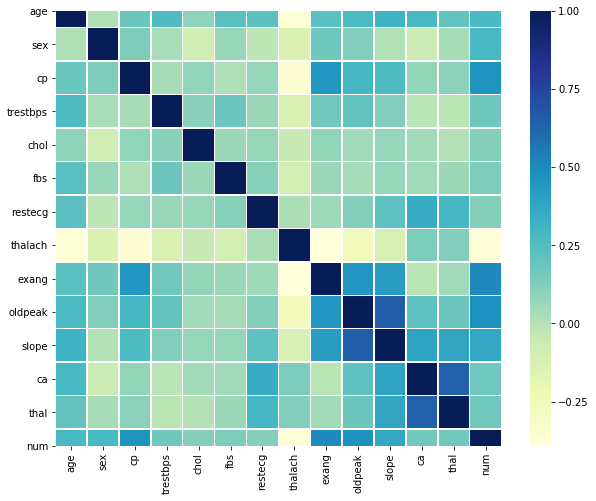

In [29]:
corrMatrix = heart_disease_df.corr()

fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(corrMatrix, cmap="YlGnBu", linewidths=.5)


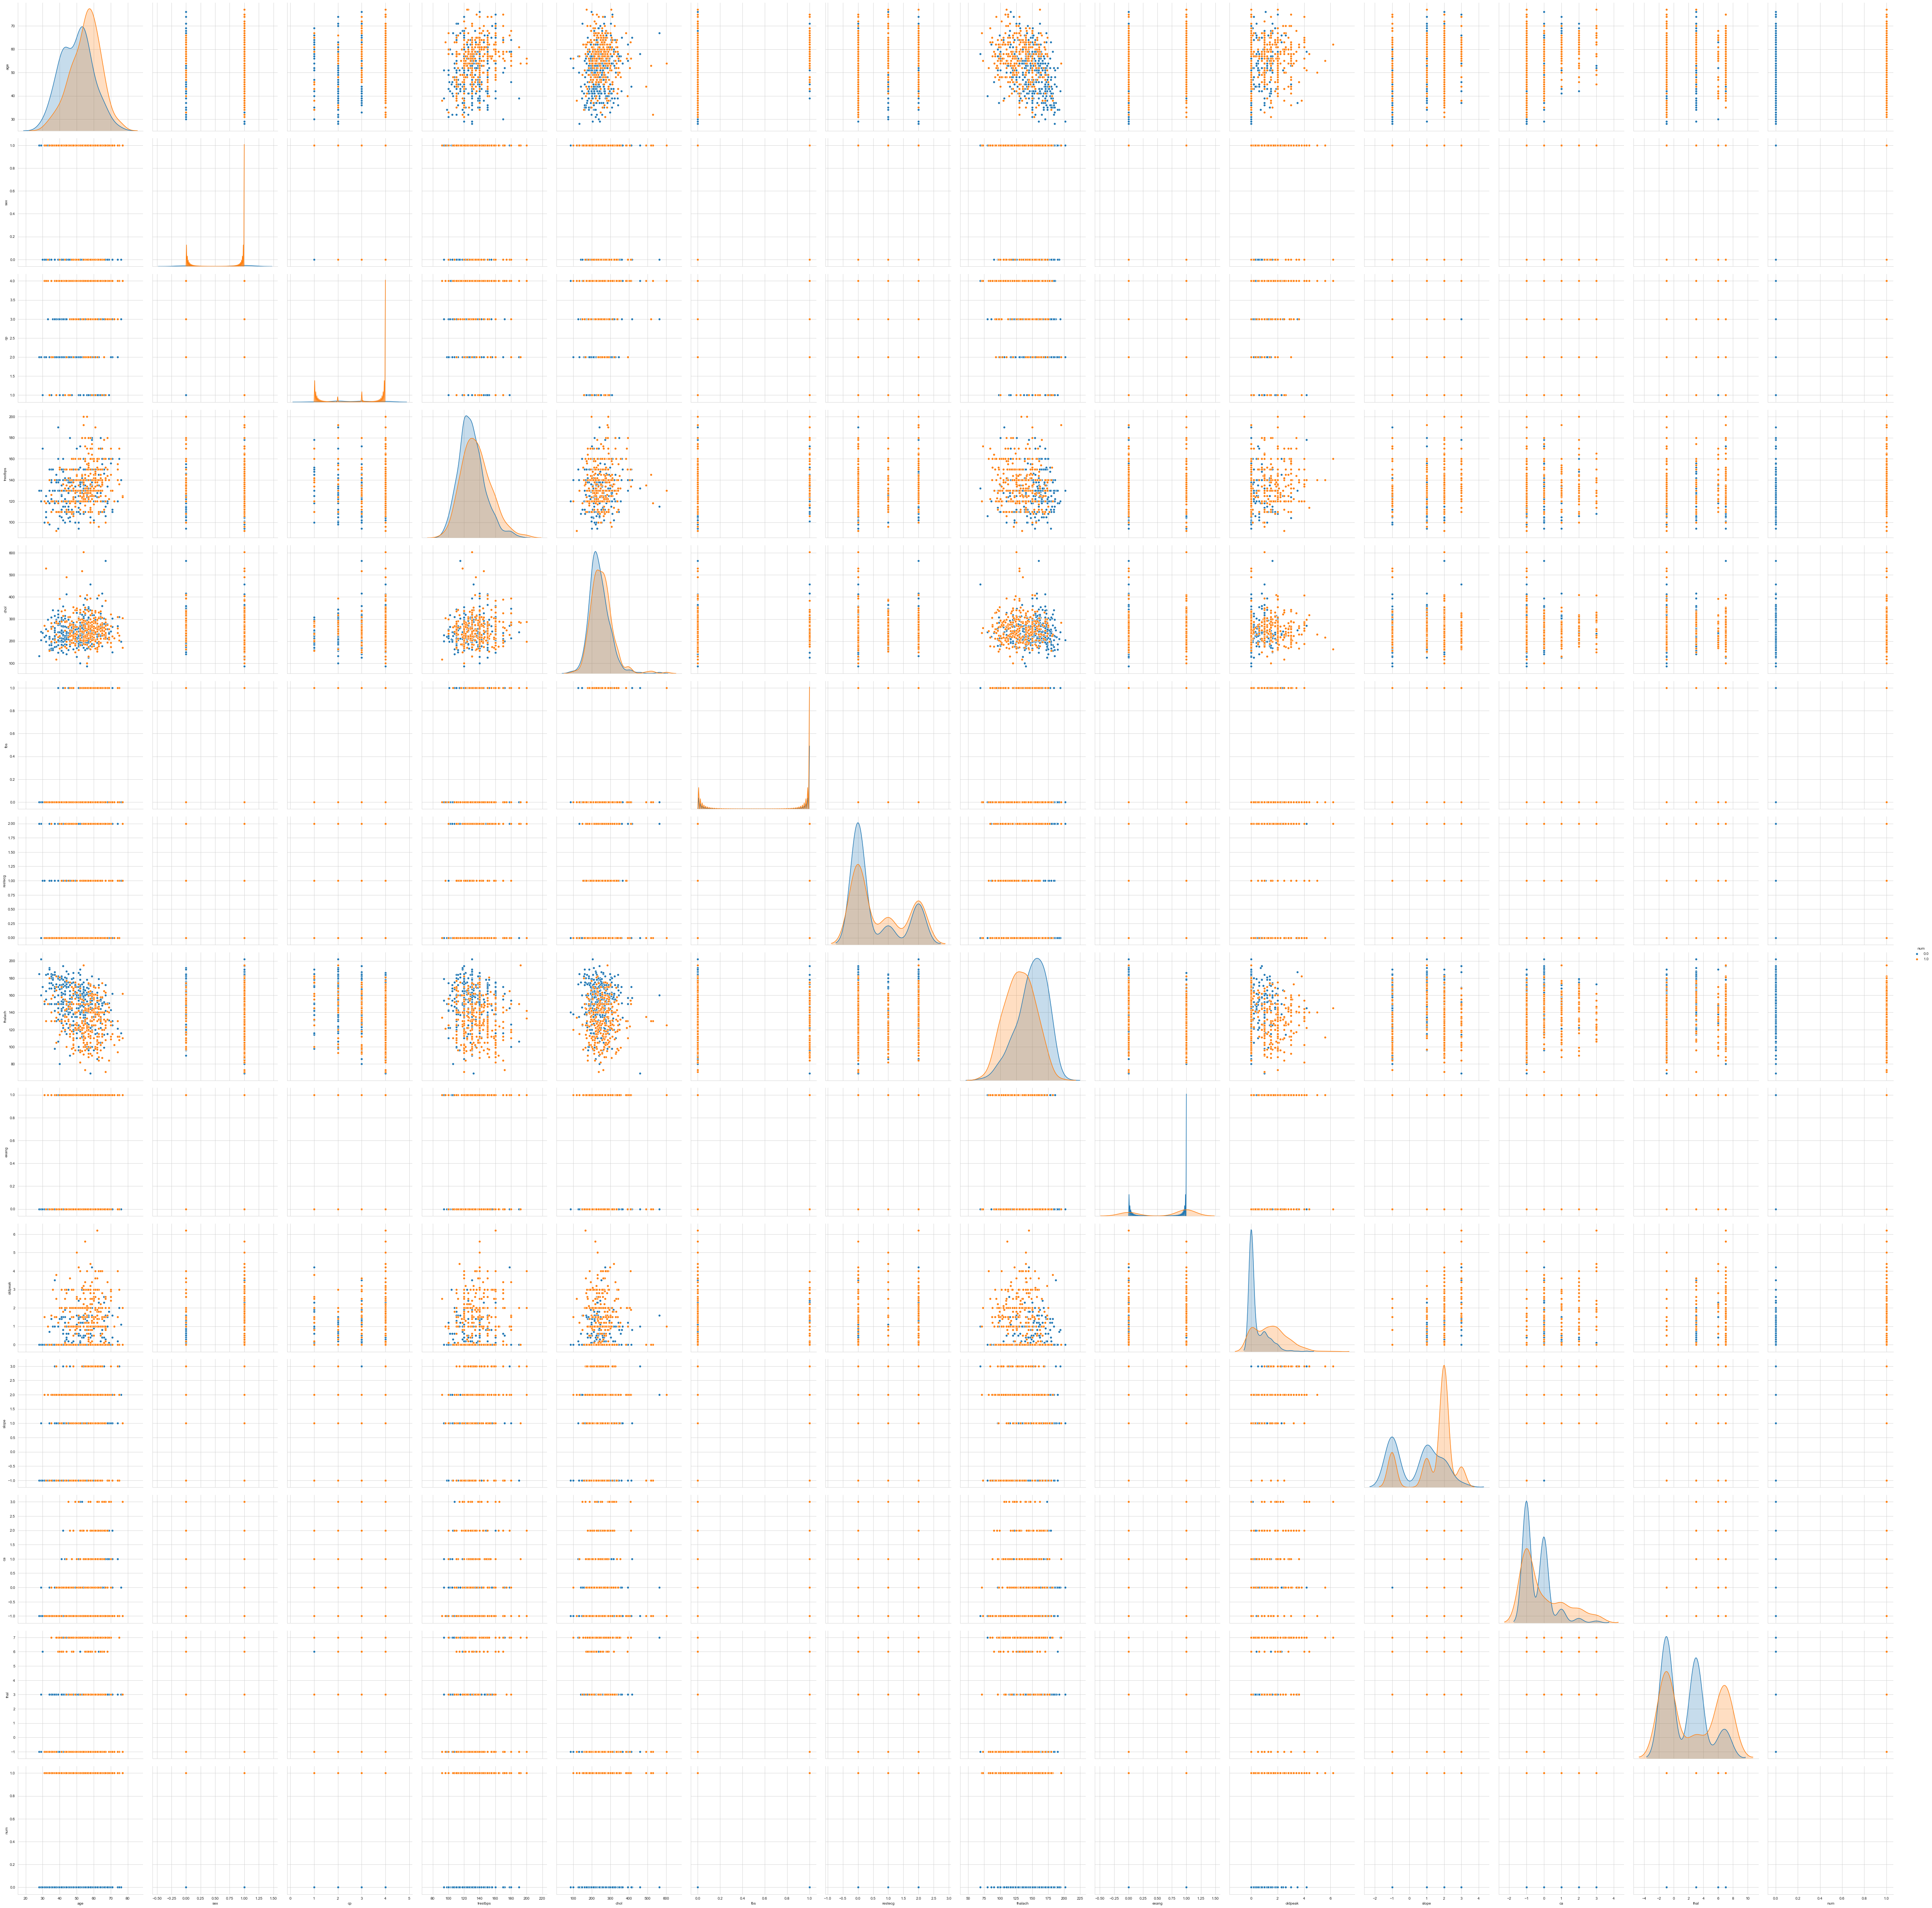

In [32]:
sns.set_style("whitegrid")
sns.pairplot(heart_disease_df, hue="num", size=5);
plt.show()